# **IMAGE CLASSIFICATION USING CNNS**

### Importing dataset

In [5]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-08-28 13:50:34--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2024-08-28 13:50:35--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8220725c7a225739d2270242d.dl.dropboxusercontent.com/cd/0/inline/CZgQWMUeh6vzsImQqsjI6EnBn6Us2ZRaVAC_Y0iy0tD8aB1T1WXsghegusagBj772VwoYCE32Hb6Td3ycHoG4JMY1M3nd7e5GVfx1bu9mD6M8GAbeHZnBfUsQWbdk08Ac2lR91xy5PFf7GI48mVebp-N/file# [following]
--2024-08-28 13:50:35--  https://uce8220725c7a225739d2270242d.dl.dropboxusercontent.com/c

### Unzip dataset

In [6]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

### Import Libraries

In [7]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Parameter Initialization

In [8]:
img_width, img_height = 150, 150
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_sample = 100
nb_validation_sample = 500
epochs = 20
batch_size = 20

### Checking shapes of the images

In [9]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)

### Image Generation to train the model

In [10]:
train_datagen = ImageDataGenerator (rescale =1. /255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator (rescale = 1. /255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size = (img_width,img_height), batch_size = batch_size, class_mode = 'binary', classes = ['cats','dogs'])

validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size = (img_width, img_height), batch_size=batch_size, class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Represetaton of ImageDataGenerator

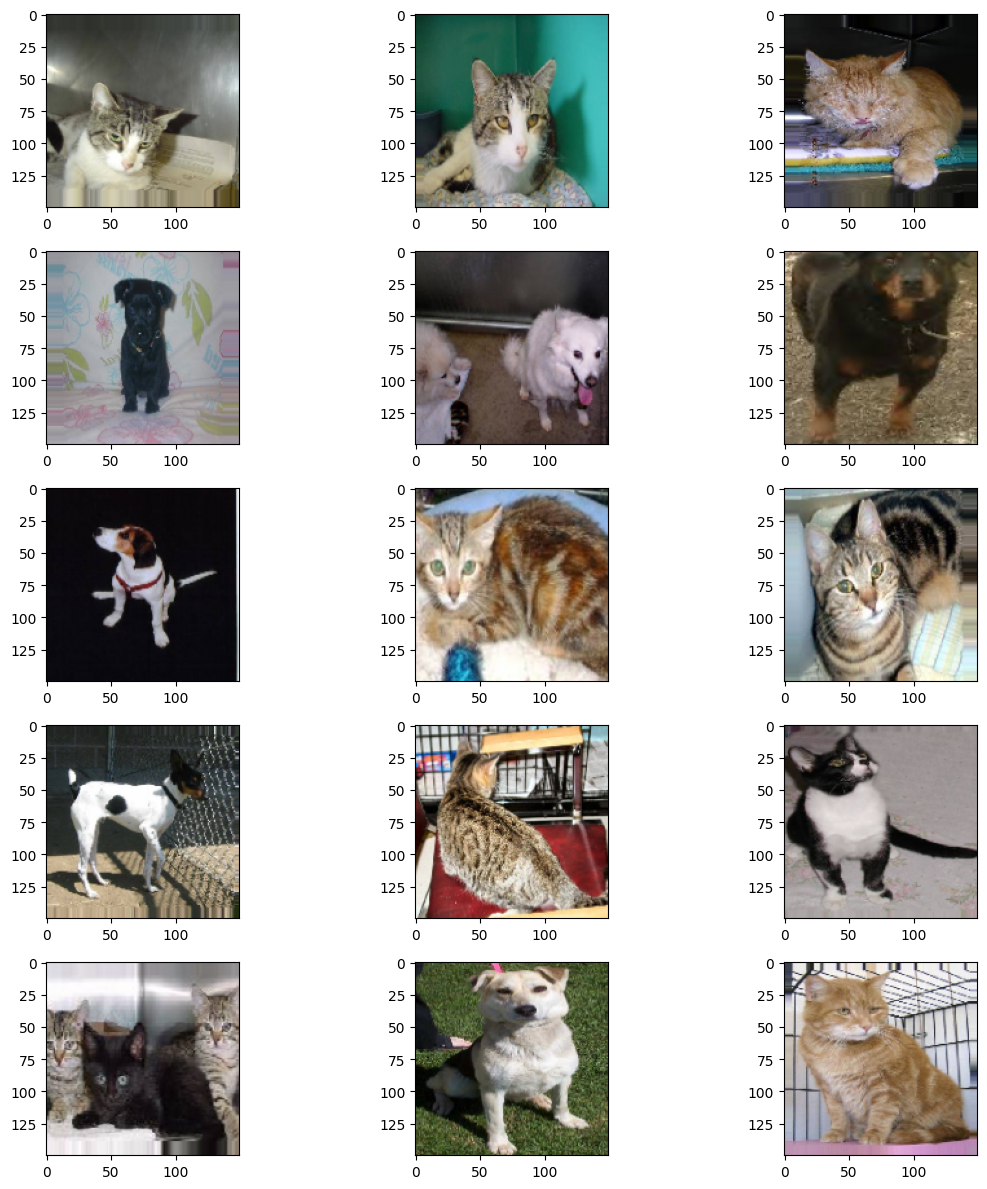

In [14]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
      image = X_batch[0]
      plt.imshow(image)
      break
plt.tight_layout()
plt.show()

### **BUILDING THE CNN**

Layens in CNN

1. Convolutional Layer
2. ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)

In [41]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=input_shape))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

### Model Fitting

In [43]:
training = model.fit(train_generator, steps_per_epoch= nb_train_sample, epochs = epochs, validation_data=validation_generator, validation_steps = nb_validation_sample)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.5163 - loss: 4.2682 - val_accuracy: 0.5744 - val_loss: 0.6710
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.5833 - loss: 0.6730 - val_accuracy: 0.6530 - val_loss: 0.6302
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.6553 - loss: 0.6561 - val_accuracy: 0.6935 - val_loss: 0.5913
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.6425 - loss: 0.6420 - val_accuracy: 0.6802 - val_loss: 0.5954
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6000 - loss: 0.6568 - val_accuracy: 0.5863 - val_loss: 0.7106
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.6606 - loss: 0.6090 - val_accuracy: 0.5348 - val_loss: 0.9753
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.6494 - loss: 0.6266 - val_accuracy: 0.6530 - val_loss: 0.6362
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.6415 - loss: 0.6

### Finding the Accuracy

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


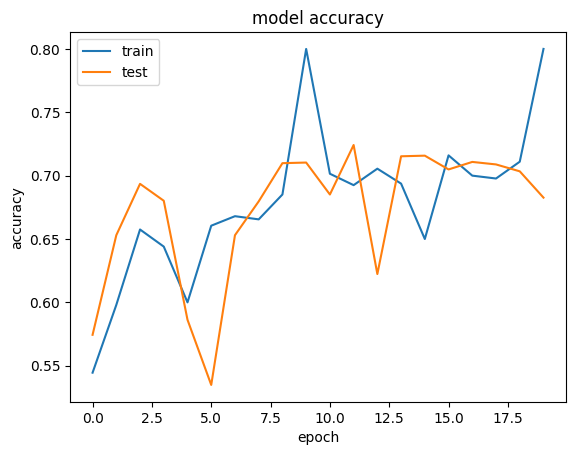

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


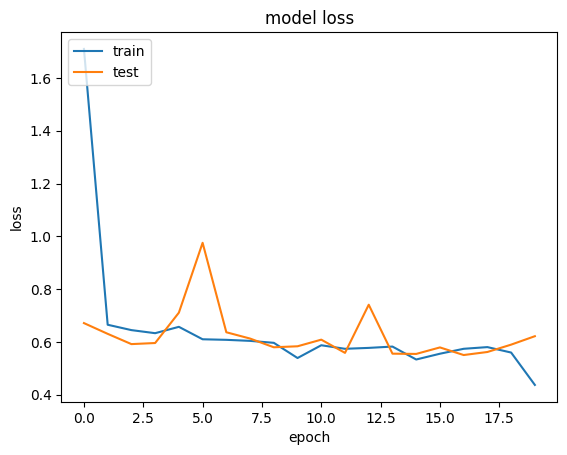

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

print(training.history.keys())
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### Image Predicition

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: /content/test_set/test_set/cats/cat.4337.jpg
Prediction: Cat
Prediction score: 0.0



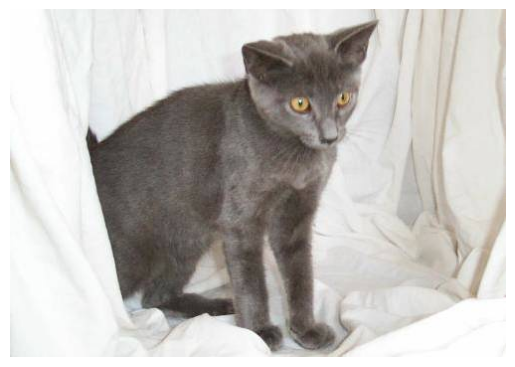

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image: /content/test_set/test_set/dogs/dog.4658.jpg
Prediction: Dog
Prediction score: 1.0



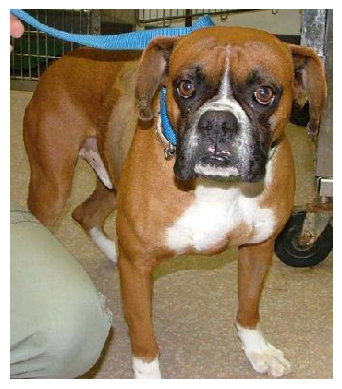

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: /content/test_set/test_set/cats/cat.4059.jpg
Prediction: Cat
Prediction score: 0.0



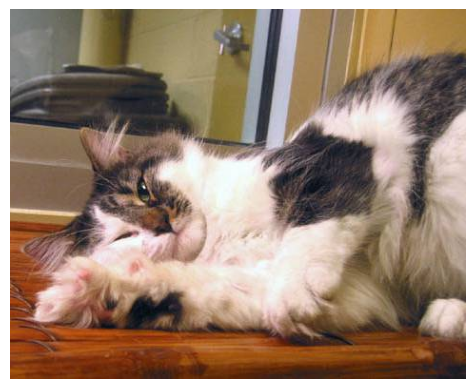

In [53]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import random


def predict_random_images(model, directory, num_images=10, target_size=(150, 150)):

    all_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                all_images.append(os.path.join(root, file))


    selected_images = random.sample(all_images, num_images)


    for image_path in selected_images:

        img_pred = image.load_img(image_path, target_size=target_size)
        img_pred = img_to_array(img_pred)
        img_pred = np.expand_dims(img_pred, axis=0)

        rslt = model.predict(img_pred)
        if rslt[0][0] == 1:
            prediction = "Dog"
        else:
            prediction = "Cat"

        print(f'Image: {image_path}')
        print('Prediction:', prediction)
        print('Prediction score:', rslt[0][0])
        print('')

        img = load_img(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

predict_random_images(model, '/content/test_set/test_set/', num_images=3)
